# read the data, take a glimpse of it

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [0]:
%matplotlib inline

In [0]:
books = pd.read_csv("books.csv", error_bad_lines=False)

b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


In [0]:
def givemefive(x):
    if isinstance(x, pd.DataFrame):
        print(x.shape)
        print(x.info())
        return x.head()
    else:
        print("x is not a fcking DataFrame")

# define function practise

In [0]:
givemefive(books)

(13714, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13714 entries, 0 to 13713
Data columns (total 10 columns):
bookID                13714 non-null int64
title                 13714 non-null object
authors               13714 non-null object
average_rating        13714 non-null float64
isbn                  13714 non-null object
isbn13                13714 non-null int64
language_code         13714 non-null object
# num_pages           13714 non-null int64
ratings_count         13714 non-null int64
text_reviews_count    13714 non-null int64
dtypes: float64(1), int64(5), object(4)
memory usage: 1.0+ MB
None


,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


# Get rid of duplicate columns

In [0]:
books.drop(['bookID'],axis= 1,inplace = True)
books.rename(columns = {'# num_pages':'num_pages'}, inplace = True)

books.drop(columns = 'isbn13', inplace = True)
books.set_index('isbn', inplace = True)

# EDA -- number of books vs auther

In [0]:
df = books

In [0]:
books.loc[books['num_pages'].idxmax()] # get the biggest id that num_pages is the largest
pd.DataFrame(books.groupby('language_code').size().sort_values(ascending = False)) # usage of size() 

,0
language_code,
eng,10594
en-US,1699
spa,419
en-GB,341
ger,238
fre,209
jpn,64
por,27
mul,21


In [0]:
books_per_author = books.drop_duplicates(subset=['title', 'authors']).groupby('authors').size().reset_index().sort_values(by=0, ascending=False)

In [0]:
test = books_per_author.head(25)

In [0]:
sns.set_style('darkgrid')

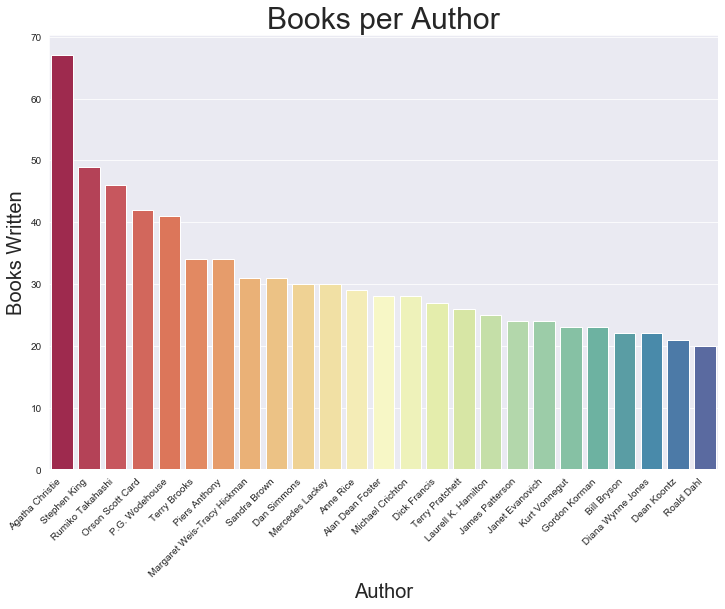

In [0]:
_, ax = plt.subplots(figsize=(12, 8))
chart = sns.barplot(x='authors', y=0, data=test, ax=ax, palette='Spectral')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_xlabel('Author', size=20)
chart.set_ylabel('Books Written', size=20)
chart.set_title('Books per Author', size=30)
plt.show()

In [0]:
books.rename(columns = {'# num_pages':'num_pages'}, inplace = True)

# check missing values

In [0]:
books.isna().sum() # check the missing value

title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
dtype: int64

In [0]:
temp = pd.DataFrame(books.groupby('language_code').agg({'num_pages': max}).sort_values(by = 'num_pages', ascending = False))

# EDA -- number of books vs diff languages <1>

In [0]:
temp['language'] = temp.index

In [0]:
temp.reset_index(drop=True, inplace=True)

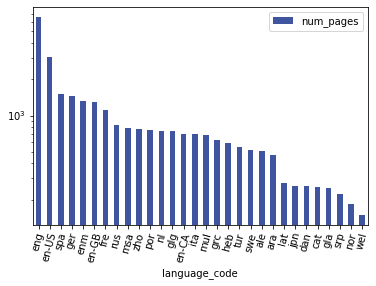

In [0]:
temp.plot(kind = 'bar',alpha=0.75, rot=75, logy=True) # this is convient, and looks good.
    # this en-US looks suspecious, but leave it for now.

In [0]:
sns.set_style('dark')

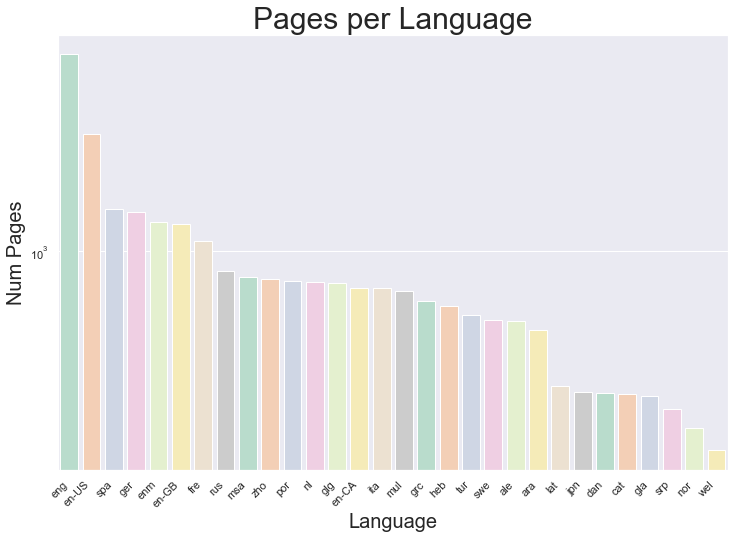

In [0]:
_, ax = plt.subplots(figsize=(12, 8))
chart = sns.barplot(x='language', y='num_pages', data=temp, ax=ax, palette='Pastel2')
sns.set(font_scale = 1)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_title('Pages per Language', size=30)
chart.set_xlabel('Language', size=20)
chart.set_ylabel('Num Pages', size=20)
chart.set_yscale('log')
plt.show()

# EDA -- Different angle of number of books vs languages <2>

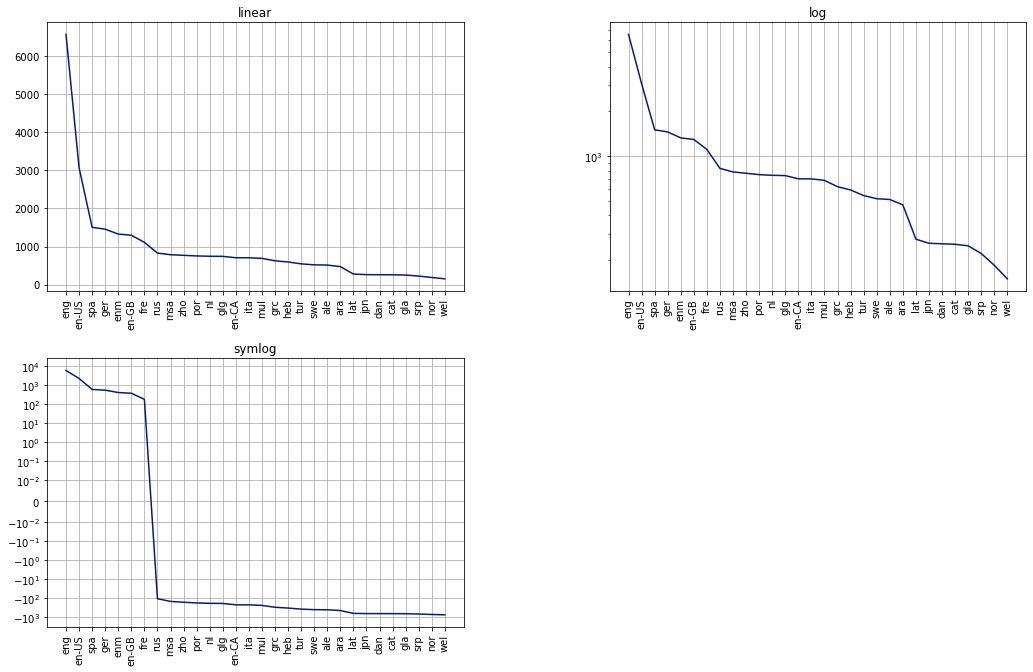

In [0]:
from matplotlib.ticker import NullFormatter  # useful for `logit` scale
# define x and y
x = temp.index
y = temp.num_pages
# plot with various axes scales
plt.figure(figsize = (16,10))
# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.xticks(rotation=90)
plt.title('linear')
plt.grid(True)

# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.xticks(rotation=90)
plt.title('log')
plt.grid(True)

# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.xticks(rotation=90)
plt.title('symlog')
plt.grid(True)




# Format the minor tick labels of the y-axis into empty strings with

# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
    # Get the current Axes instance on the current figure matching the given keyword args, or create one
    # e.g.: plt.gca(projection='polar')
    
    # Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.show()

# EDA -- aggragation (sum()) of rating counts 

In [0]:
# about isbn & isbn13 are they unique?
books.isbn.nunique() == books.isbn13.nunique() # True, So, choose isbn as the index

True

In [0]:
df = books # you know

In [0]:
# remove duplicate ID
df.drop(columns = 'isbn13', inplace = True)
df.set_index('isbn', inplace = True)

Text(0.5, 1.0, 'y-scale')

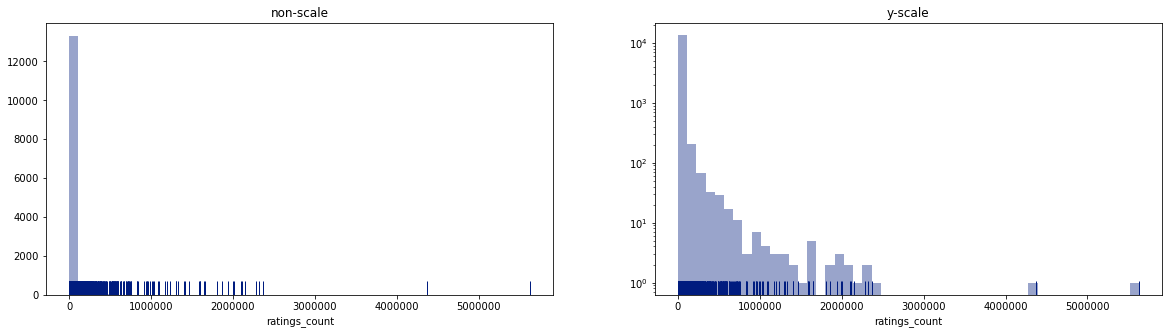

In [0]:
plt.figure(figsize = (20,11))
# no y-scale
plt.subplot(221)
x = df.ratings_count
sns.distplot(x, kde=False, rug=True)
plt.title('non-scale')

# y-scale
plt.subplot(222)
x = df.ratings_count
sns.distplot(x, kde=False, rug=True)
plt.yscale('log')
plt.title('y-scale')

# EDA one: rating_count  VS authors

In [0]:
temp1 = pd.DataFrame(books.groupby('authors')['ratings_count'].sum()).sort_values(by = 'ratings_count', ascending = False)
temp2 = pd.DataFrame(books['authors'].value_counts()) # the Length:7600 equals -- books['authors'].nunique() --
temp2.rename(columns = {'authors':'counts'}, inplace = True)
temp = pd.concat([temp1, temp2], axis=1)
temp['rate_eff'] = temp['ratings_count']/temp['counts']
    # column concatenate using df.concate()
    # row concatenate using df.append()
    
    # HERE, Next time concatenate by index would be better        #yoyoyo
    # could I use .format() here?      #yoyoyo

In [0]:
# now sort by rate_eff
temp.sort_values(by = 'rate_eff', ascending = False)

,ratings_count,counts,rate_eff
Stephenie Meyer,4369733,2,2184866.500
J.K. Rowling-Mary GrandPré,13875449,8,1734431.125
Paulo Coelho-Alan R. Clarke-Özdemir İnce,1592632,1,1592632.000
Charlotte Brontë-Michael Mason-João Gaspar Rodrigues-Mécia,1328143,1,1328143.000
Sara Gruen,1198632,1,1198632.000
...,...,...,...
Andrew P. Trout,0,1,0.000
Dan Hitt-James Beckett III,0,1,0.000
Carol Marinelli,0,1,0.000
Jay Parini-August Wilson,0,1,0.000


# feature engineering -- create new column 'rate_eff' and Visualization: authors vs rate_eff

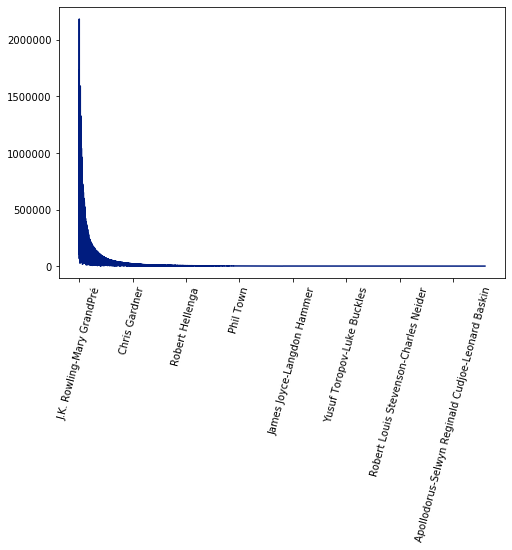

In [0]:
# temp_new.sort_values(by = 'rate_eff', ascending = False).plot.scatter(x = temp_new.index, y = 'rate_eff')
# temp_new.reset_index().plot(kind='scatter', x='index', y='rate_eff') 
plt.figure(figsize=(8,5))
temp['rate_eff'].plot(rot = 75) # a mediocre plot........ # yoyoyo

# EDA -- Duplication Records problems

In [0]:
df = books # you know

In [0]:
df[df['authors'] == 'Stephenie Meyer'] # so, are they duplicates????   #yoyoyo

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
3938,12024,Twilight (Twilight #1),Stephenie Meyer,3.59,031605898X,9780316058988,eng,544,2392,544
12243,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,0316015849,9780316015844,eng,498,4367341,93619


In [0]:
temp = df
temp = temp.reset_index()
temp.head()

,index,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [0]:
# let's find out how many duplicates are there?
# Option One -- It is fucked
a_list = temp['title']
duplicates = []
for item in a_list:
    if a_list.count(item) > 1:
        duplicates.append(item)

KeyError: 'Requested level (Harry Potter and the Half-Blood Prince (Harry Potter  #6)) does not match index name (None)'

In [0]:
# Option Two
import collections
print([item for item, count in collections.Counter(a_list).items() if count > 1])

['Harry Potter and the Half-Blood Prince (Harry Potter  #6)', "Harry Potter and the Sorcerer's Stone (Harry Potter  #1)", 'Harry Potter and the Chamber of Secrets (Harry Potter  #2)', 'Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)', "The Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy  #1)", 'A Short History of Nearly Everything', "Bill Bryson's African Diary", 'The Lord of the Rings (The Lord of the Rings  #1-3)', 'The Fellowship of the Ring (The Lord of the Rings  #1)', 'The Changeling', 'The Known World', 'The Power of One (The Power of One  #1)', 'Anna Karenina', 'The Untouchable', 'Tropic of Cancer', 'The Portrait of a Lady', 'Treasure Island', 'Daniel Deronda', 'One Hundred Years of Solitude', 'Cien años de soledad', 'Jitterbug Perfume', 'Perfume: The Story of a Murderer', 'The Moon is a Harsh Mistress', 'To Sail Beyond the Sunset', 'The Phantom Tollbooth', 'Lincoln at Gettysburg: The Words That Remade America', 'Underworld', 'Libra', 'Mao II', 'A

In [0]:
# Option Three
seen = {}
dupes = []

for x in a_list:
    if x not in seen:
        seen[x] = 1
    else:
        if seen[x] == 1:
            dupes.append(x)
        seen[x] += 1

In [0]:
pd.DataFrame(dupes)

,0
0,The Hitchhiker's Guide to the Galaxy (Hitchhik...
1,The Lord of the Rings (The Lord of the Rings ...
2,The Changeling
3,The Known World
4,The Power of One (The Power of One #1)
...,...
761,Courtesans and Fishcakes: The Consuming Passio...
762,La hierba del diablo (La Torre Oscura #1)
763,The Curious Sofa
764,Lirael (Abhorsen #2)


# conclusion for duplicate problem:(Not achieve)
trying to find out duplicates by 'title', but failed.
Goal: print out a dataframe with the duplicate title and counts as columns.

# feature engineering -- create new column 'text_rev_ratio' and Visualization: text_rev_ratio	VS average rating

In [0]:
temp = books

In [0]:
# remove 0s in rating_count
temp = temp[(temp['ratings_count'] != 0)]

In [0]:
# create new column with 'text_v_count / rating_count'
temp['text_rev_ratio'] = temp['text_reviews_count']/temp['ratings_count']

C:\Users\MIN-Mark\.conda\envs\mark\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
# take a look
temp.sort_values(by = 'text_rev_ratio', ascending = False) # good

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,text_rev_ratio
isbn,,,,,,,,
0862921473,Theocritus: Select Poems: Select Poems,Theocritus-Kenneth James Dover,3.00,grc,395,1,1,1.0
3485009601,Ein Koch für Mma Ramotswe (No. 1 Ladies' Detec...,Alexander McCall Smith,3.98,ger,240,2,2,1.0
0689118449,The Illustrated Garden Book: A New Anthology,Robin Lane Fox-Vita Sackville-West-Freda Titf...,4.19,eng,192,1,1,1.0
0811832791,The Halloween Activity Book: Creepy Crawly H...,Mymi Doinet-Benjamin Chaud,2.00,eng,32,1,1,1.0
0091895812,The Toy Maker: The Life and Times of Inventor ...,Anthony Mcreavy,3.00,eng,352,1,1,1.0
...,...,...,...,...,...,...,...,...
3446187499,Norden,Seamus Heaney,4.09,ger,127,2,0,0.0
0571210910,Finders Keepers: Selected Prose 1971-2001,Seamus Heaney,4.15,en-GB,432,16,0,0.0
0812034112,Dante Alighieri's Divine Comedy the Inferno,Dante Alighieri,4.00,en-US,101,5,0,0.0


In [0]:
temp['ratings_count'].describe() # find a propor benchmark for visualization

count    1.360000e+04
mean     1.791431e+04
std      1.134179e+05
min      1.000000e+00
25%      8.800000e+01
50%      6.505000e+02
75%      4.808250e+03
max      5.629932e+06
Name: ratings_count, dtype: float64

In [0]:
# create new categorical column. split 'ratings_count' into high or low.
temp['rating_level'] = temp['ratings_count'].apply(lambda x: 'high' if x >= 5000 else 'low') 
             # tried different benchmark to define what is 'high' and 'low'
             # tried 50, 200, 5000, 500000.

C:\Users\MIN-Mark\.conda\envs\mark\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


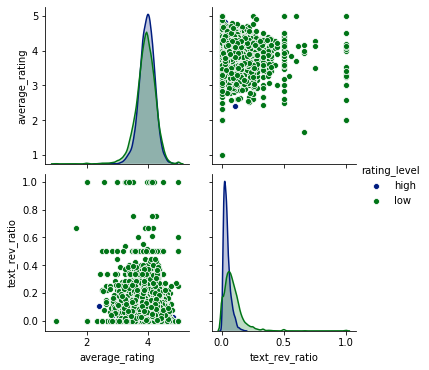

In [0]:
# visualization to see if the text_rev_ratio vs average_rating has any difference on high vs low.
sns.pairplot(vars=['average_rating', 'text_rev_ratio', ], data = temp, hue='rating_level')

# The answer is con't tell from the plot.

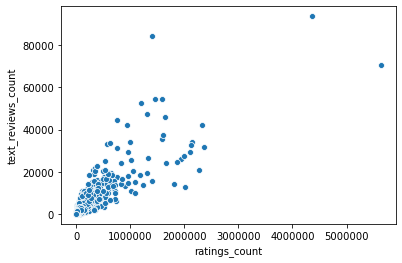

In [0]:
ax2 = sns.scatterplot(y="text_reviews_count", x="ratings_count", data=temp)

In [0]:
temp[temp['language_code'] != 'eng'].sort_values(by = 'text_rev_ratio', ascending = False) # one recode, lang_code = 'spa'
    # It is reasonable, other languages don't have enough people to make reviews, they are filtered out.

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,text_rev_ratio
isbn,,,,,,,,
0307347974,Fahrenheit 451,Ray Bradbury-Alfredo Crespo,3.98,spa,175,690801,14489,0.020974


# Conclusion for EDA: we can define a new standard of popular, 0.006 ~ 0.06 text_rev_ratio is a popular book.

# EDA -- find out the key word of series books

In [0]:
df = books
temp = df

C:\Users\MIN-Mark\.conda\envs\mark\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
temp[temp['title'].str.contains("Boxed")] # it shows some num_pages equals to 0.!!!!!

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count
isbn,,,,,,,
0439682584,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling-Mary GrandPré,4.78,eng,2690,38872,154
0345538374,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,4.59,eng,1728,97731,1536
0553609416,The Complete Anne of Green Gables Boxed Set (A...,L.M. Montgomery,4.43,eng,2088,95486,1449
0439884764,Guardians of Ga'hoole Boxed Set (Guardians of ...,Kathryn Lasky,4.25,eng,865,595,31
0789488779,Touch & Feel: Animals Boxed Set,Jennifer Quasha-Deni Brown-Dawn Sirett,4.05,eng,36,22,2
0765344955,Ender's Game Boxed Set: Ender's Game Ender's ...,Orson Scott Card,4.49,en-US,1296,1755,60
0618037667,The Lord of the Rings Millennium Edition Boxed...,J.R.R. Tolkien,4.49,eng,1472,118,5
0590598872,Baby-Sitters Club Boxed Set #1 (The Baby-Sitte...,Ann M. Martin,3.85,en-US,0,5241,96
0812575601,The Sword of Truth Boxed Set I: Wizard's Firs...,Terry Goodkind,4.29,en-US,2480,4110,81


First, Find out a way to add the box set sells into the individule book sells

In [0]:
# find out the key words stands for series sells.-- try keyword 'Set'
temp[temp['title'].str.contains(pat = "Set")]

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count
isbn,,,,,,,
0439682584,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling-Mary GrandPré,4.78,eng,2690,38872,154
0345538374,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,4.59,eng,1728,97731,1536
0618153977,The Lord of the Rings Box Set,J.R.R. Tolkien,4.49,eng,1223,216,19
043932162X,Harry Potter Schoolbooks Box Set: Two Classic ...,J.K. Rowling,4.40,eng,240,11459,143
0553609416,The Complete Anne of Green Gables Boxed Set (A...,L.M. Montgomery,4.43,eng,2088,95486,1449
0345417984,Setting Free the Bears,John Irving,3.30,eng,304,8680,205
0439884764,Guardians of Ga'hoole Boxed Set (Guardians of ...,Kathryn Lasky,4.25,eng,865,595,31
0517146541,Setting Free the Bears / The Water-Method Man ...,John Irving,3.82,eng,718,296,7
0440360374,The Time Quartet Box Set (Time Quartet #1-4),Madeleine L'Engle-Peter Sís,4.35,eng,750,10728,168


In [0]:
# find out the key words stands for series sells.-- try keyword 'Boxed'
temp[temp['title'].str.contains(pat = "Boxed")].index.isin(temp[temp['title'].str.contains(pat = "Set")].index)
    # all 'Boxed' rows have been selected by 'Set' rows

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [0]:
# let's see if 'Boxed' index = 'Boxed Set' index
(temp[temp['title'].str.contains(pat = "Boxed")].index == temp[temp['title'].str.contains(pat = "Boxed Set")].index).sum()
    # so yes.

12

In [0]:
# according to analysis above, if boxed and set happen together, it is a series of book set:
temp[temp['title'].str.contains(pat = "Boxed Set")]

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count
isbn,,,,,,,
0439682584,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling-Mary GrandPré,4.78,eng,2690,38872,154
0345538374,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,4.59,eng,1728,97731,1536
0553609416,The Complete Anne of Green Gables Boxed Set (A...,L.M. Montgomery,4.43,eng,2088,95486,1449
0439884764,Guardians of Ga'hoole Boxed Set (Guardians of ...,Kathryn Lasky,4.25,eng,865,595,31
0789488779,Touch & Feel: Animals Boxed Set,Jennifer Quasha-Deni Brown-Dawn Sirett,4.05,eng,36,22,2
0765344955,Ender's Game Boxed Set: Ender's Game Ender's ...,Orson Scott Card,4.49,en-US,1296,1755,60
0618037667,The Lord of the Rings Millennium Edition Boxed...,J.R.R. Tolkien,4.49,eng,1472,118,5
0590598872,Baby-Sitters Club Boxed Set #1 (The Baby-Sitte...,Ann M. Martin,3.85,en-US,0,5241,96
0812575601,The Sword of Truth Boxed Set I: Wizard's Firs...,Terry Goodkind,4.29,en-US,2480,4110,81


In [0]:
x = temp[temp['title'].str.contains(pat = "Set")]
y = temp[temp['title'].str.contains(pat = "Boxed")]
sign = pd.Series(x.index.isin(y.index)).values

In [0]:
x[sign == False] # well it's not too much so let take a look. (36 - 12 = 24)
   
    # the other possible way stands for a series of books include: 'Box Set', 'Book Set'

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count
isbn,,,,,,,
0618153977,The Lord of the Rings Box Set,J.R.R. Tolkien,4.49,eng,1223,216,19
043932162X,Harry Potter Schoolbooks Box Set: Two Classic ...,J.K. Rowling,4.40,eng,240,11459,143
0345417984,Setting Free the Bears,John Irving,3.30,eng,304,8680,205
0517146541,Setting Free the Bears / The Water-Method Man ...,John Irving,3.82,eng,718,296,7
0440360374,The Time Quartet Box Set (Time Quartet #1-4),Madeleine L'Engle-Peter Sís,4.35,eng,750,10728,168
0694524751,The Chronicles of Narnia CD Box Set,C.S. Lewis-Kenneth Branagh,4.26,eng,31,198,24
009928555X,Set This House On Fire,William Styron,3.70,eng,567,551,31
1885972105,Uncle Setnakt's Essential Guide to the Left Ha...,Don Webb,4.36,eng,128,106,8
0586066888,A Darkness At Sethanon (The Riftwar Saga #4),Raymond E. Feist,4.19,en-GB,527,49946,421


In [0]:
# ok, so let's get this 'title --> series book' part a conclusion
y1 = temp[temp['title'].str.contains(pat = "Boxed")].index
y2 = y1.append(temp[temp['title'].str.contains(pat = "Box Set")].index)
y3 = y2.append(temp[temp['title'].str.contains(pat = "Book Set")].index)
y4 = y3.append(temp[temp['title'].str.contains(pat = "Volumes")].index)

In [0]:
z = temp[temp.index.isin(y4)] # this do the trick
    # Here, z stands for all box set books.

In [0]:
z.shape # before y4, it is 21.

(25, 7)

# Conclusion for EDA: in a way they are duplicates. 
# the key words are: 'Boxed', 'Box Set','Book Set', 'Volumes'

# EDA -- if number of pages of the book affect the rating.

In [0]:
temp = books

C:\Users\MIN-Mark\.conda\envs\mark\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
# take a look
temp[temp['num_pages'] == 0]
    # This could be a problem because you can't bin it. short, mediate or long. 

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count
isbn,,,,,,,
0802415318,The 5 Love Languages / The 5 Love Languages Jo...,Gary Chapman,4.71,eng,0,20,4
0736606378,The Clan of the Cave Bear Part 1 of 2 (Earth'...,Jean M. Auel-Donada Peters,4.43,eng,0,611,34
140015068X,The Tragedy of Pudd'nhead Wilson,Mark Twain-Michael Prichard,3.79,eng,0,3,0
0965903532,The Lady and the Unicorn,Tracy Chevalier,3.68,eng,0,303,24
0739339788,The Da Vinci Code (Robert Langdon #2),Dan Brown-Paul Michael,3.82,eng,0,90,16
...,...,...,...,...,...,...,...
0517164353,Fine Lines (One-Eyed Mack #6),Jim Lehrer,3.23,eng,0,17,3
0671046241,Stowaway and Milk Run: Two Unabridged Stories ...,Mary Higgins Clark-Jan Maxwell,3.40,eng,0,55,0
0449210847,The Mask of the Enchantress,Victoria Holt,3.84,eng,0,20,1


In [0]:
# get rid of the series books
temp_new = temp.drop(z.index) 

In [0]:
# get rid of the 0 pages books
temp_new = temp_new[temp_new['num_pages'] != 0]

In [0]:
temp_new # ok, it's good

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count
isbn,,,,,,,
0439785960,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,eng,652,1944099,26249
0439358078,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,eng,870,1996446,27613
0439554934,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,eng,320,5629932,70390
0439554896,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,eng,352,6267,272
043965548X,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,eng,435,2149872,33964
...,...,...,...,...,...,...,...
0061186422,M Is for Magic,Neil Gaiman-Teddy Kristiansen,3.82,eng,260,11317,1060
0930289552,Black Orchid,Neil Gaiman-Dave McKean,3.72,eng,160,8710,361
0061238961,InterWorld (InterWorld #1),Neil Gaiman-Michael Reaves,3.53,en-US,239,14334,1485


In [0]:
temp_new.describe()
    # to column 'num_pages', min = 1, 25% = 198, 50% = 302, 75% = 421, max = 6576.

,average_rating,num_pages,ratings_count,text_reviews_count
count,13606.000000,13606.000000,1.360600e+04,13606.000000
mean,3.929816,342.359841,1.787981e+04,537.376672
std,0.357521,239.021957,1.133908e+05,2538.603871
min,0.000000,1.000000,0.000000e+00,0.000000
25%,3.770000,198.000000,8.500000e+01,7.000000
50%,3.960000,302.000000,6.440000e+02,41.000000
75%,4.130000,421.000000,4.764500e+03,224.000000
max,5.000000,4736.000000,5.629932e+06,93619.000000


In [0]:
# the longest 'num_pages' looks fishy, let's take a look:

temp_new[temp_new['num_pages'] == 4736] # well, it just a long book, so I think I get rid of all the series of books.

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,cate_num_pag
isbn,,,,,,,,
039541685X,The Second World War,Winston S. Churchill-John Keegan,4.44,eng,4736,1437,94,long


In [0]:
# let's bin the 'num_pages'
bins = [1, 10, 200, 500, 6600]
labels =['micro','short','medium','long']
temp_new['cate_num_pag'] = pd.cut(temp_new['num_pages'], bins, labels = labels) #ok, it looks good.

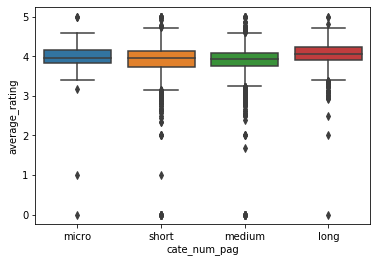

In [0]:
# Maybe later we can beased on the relationship between ave_rating and num_pages(s,m,l) to fill the 0s.
ax = sns.boxplot(x="cate_num_pag", y="average_rating", data=temp_new)
    
    # the plot didnt show significant difference, it is hard to fill up the 0 num_pages based on ava_rating.

# EDA -- num_pages = 0 problem

#Goal of this part: trying to use a Tree model to anticipate the number of pages that equals to 0. 

# num_pages ~ average_rating + ratings_count + text_rev_ratio

In [0]:
# get the data.
temp = books_trr

In [0]:
# Define train and test dataset.
Train = books_trr[books_trr['num_pages'] != 0]
Test = books_trr[books_trr['num_pages'] == 0]

In [0]:
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  

# define x and y
X = Train.iloc[:,[2, 5, 7]].astype(float).values
y = Train.num_pages.astype(int).values

In [0]:
# check the potential problems.
np.any(np.isnan(X)) # this is good

False

In [0]:
np.any(np.isnan(y)) # this is good

False

In [0]:
np.all(np.isfinite(X)) # If it is False, use:

            # np.where(np.isfinite(X) == False)   Very useful
# anyway, this is good

True

In [0]:
# fit the regressor with X and Y data 
regressor.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [0]:
# define test dataset
Test_X = Test.iloc[:,[2, 5, 7]].astype(float).values

In [0]:
# predicting a new value 
y_pred = regressor.predict(Test_X) 
  
# print the predicted price 
y_pred

array([4.80000000e+01, 4.16000000e+02, 9.60000000e+01, 5.76000000e+02,
       1.50000000e+01, 2.40000000e+02, 7.43000000e+02, 3.20000000e+01,
       1.89000000e+02, 6.56000000e+02, 1.00000000e+00, 8.00000000e+01,
       8.33000000e+02, 6.99000000e+02, 5.25666667e+02, 2.24000000e+02,
       1.28000000e+02, 3.36000000e+02, 7.44000000e+02, 2.58000000e+02,
       8.40000000e+02, 1.54000000e+02, 4.66000000e+02, 1.96000000e+02,
       4.00000000e+01, 2.40000000e+02, 2.64000000e+02, 4.10000000e+02,
       1.20000000e+02, 9.69000000e+02, 1.41600000e+03, 4.65000000e+02,
       4.00000000e+02, 2.56000000e+02, 1.28000000e+02, 7.20000000e+01,
       1.97333333e+02, 4.80000000e+02, 3.47000000e+02, 3.20000000e+02,
       4.40000000e+02, 4.32000000e+02, 9.03000000e+02, 1.92000000e+02,
       2.49400000e+02, 1.92000000e+02, 5.04000000e+02, 2.85000000e+02,
       6.70000000e+02, 3.70000000e+02, 5.44000000e+02, 6.24000000e+02,
       3.52000000e+02, 4.80000000e+01, 2.56000000e+02, 8.00000000e+01,
      

In [1]:
sum(y_test - y_pred)^2

NameError: ignored

# Conclusion for the model: It works but mae is large. another way. 